**Какие вузы можно назвать наиболее востребованными в России (и на каких
основаниях)?**

В данном исследовании я использовала данные из статистики от ВШЭ - это довольно проверенный и надёжный источник, которому смело можно доверять. Для начала - осмотрю таблицу на наличие пропусков или несостыковок.

In [37]:
# чтобы строки в таблице отображались целиком - использую данную ф-цию
pd.set_option('display.max_colwidth', None)

In [38]:
df = pd.DataFrame(pd.read_excel('hse_stat.xlsx', skiprows = 2))
df.head()

,Регион,Вуз,Головной вуз,тип,Категория,Средний балл ЕГЭ Б+П 2021,Средний балл ЕГЭ Б+П 2020,Средний балл ЕГЭ Б+П 2019,"Зачислено всего (Б+П), чел. 2021","Зачислено всего (Б+П), чел. 2020","Зачислено всего (Б+П), чел. 2019",Ср.балл ЕГЭ (бюджет) 2021,Ср.балл ЕГЭ (бюджет) 2020,Ср.балл ЕГЭ (бюджет) 2019,"Зачислено на бюджетные места, чел. 2021","Зачислено на бюджетные места, чел. 2020","Зачислено на бюджетные места, чел. 2019",Ср.балл ЕГЭ (платный прием) 2021,Ср.балл ЕГЭ (платный прием) 2020,Ср.балл ЕГЭ (платный прием) 2019,"Зачислено на платные места, чел. 2021","Зачислено на платные места, чел. 2020","Зачислено на платные места, чел. 2019",Средняя стоимость обучения (руб. в год) 2021,Средняя стоимость обучения (руб. в год) 2020,Средняя стоимость обучения (руб. в год) 2019
0,Москва и Московская область,Московский физико-технический институт,NaN,гос.,"НИУ, 5-100, приоритет, спецгрант, свои стандарты",95.3,95.5,95.0,1149.0,1148.0,1117.0,97.1,97.6,97.3,914.0,865.0,825.0,88.3,89.2,88.6,235.0,283.0,292.0,302857.0,271875.0,272647.0
1,Москва и Московская область,Московский государственный институт международных отношений,NaN,гос.,"приоритет, спецгрант",90.0,88.9,87.9,1258.0,1212.0,1162.0,96.7,96.2,96.2,405.0,412.0,398.0,86.8,85.2,83.6,853.0,800.0,764.0,594600.0,589850.0,561700.0
2,Москва и Московская область,"Национальный исследовательский ядерный университет ""МИФИ"", г. Москва",NaN,гос.,"НИУ, 5-100, приоритет, спецгрант, свои стандарты",89.8,90.3,89.1,1145.0,907.0,882.0,93.5,95.0,93.6,824.0,635.0,602.0,80.0,79.0,79.4,321.0,272.0,280.0,282400.0,259592.0,259807.0
3,Москва и Московская область,"Национальный исследовательский университет ""Высшая школа экономики"", г. Москва",NaN,гос.,"НИУ, 5-100, приоритет, спецгрант, свои стандарты",89.1,88.8,87.4,6608.0,6290.0,7059.0,96.3,95.2,95.4,2411.0,2418.0,2174.0,85.2,84.8,83.8,4197.0,3872.0,4885.0,519074.0,497547.0,446428.0
4,Санкт-Петербург,"Университет ИТМО, г. Санкт-Петербург",NaN,гос.,"НИУ, 5-100, приоритет, спецгрант, свои стандарты",87.9,87.4,87.6,2180.0,1847.0,1714.0,93.7,93.1,92.7,1336.0,1172.0,1153.0,78.9,77.6,77.2,844.0,675.0,561.0,235517.0,236275.0,236642.0


***Это - официальное пояснение к таблице***

**Совокупный прием**: общее количество зачисленных на бюджетные и платные места.

**Средний балл ЕГЭ**: средний балл, рассчитанный для вуза в целом, на основе средних баллов всех зачисленных в него на 1-й курс. (Средний балл каждого зачисленного — это сумма баллов по предметам, деленная на количество вступительных испытаний для соответствующего направления подготовки). При расчете средних баллов ЕГЭ «отрезаются» баллы за индивидуальные достижения и за вступительные испытания творческой направленности.

**Средний балл ЕГЭ Б+П**: средний балл для всех зачисленных в вуз на бюджетные и платные места.

**Средний балл ЕГЭ (бюджет)**: средний балл для всех зачисленных в вуз на бюджетные места.

**Средний балл ЕГЭ (платный прием)**: средний балл для всех зачисленных в вуз на платные места.

**Средняя стоимость обучения**: стоимость, которую платят зачисленные в 2021 году на места с полным возмещением затрат за один год обучения. Указана без возможных в вузе скидок. Рассчитана как среднее значение по всем направлениям подготовки, ведущим в данном вузе прием на платные места. В расчете учтена только стоимость направлений, по которым зачислен хотя бы один человек. В средней стоимости по вузу стоимость обучения на каждом направлении подготовки взвешена по количеству зачисленных на это направление (чем меньше человек зачислено, тем меньше «вклад» стоимости данного направления в среднюю стоимость обучения в вузе).

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 5
# увеличиваю отображение визуализаций для большего удобства

In [102]:
# В первую очередь - важно кол-во поступающих, я беру его за последний год, тк это наиболее свежая и нужная информация
descended_10_applicants = df.sort_values("Зачислено всего (Б+П), чел. 2021", ascending = False).head(10)

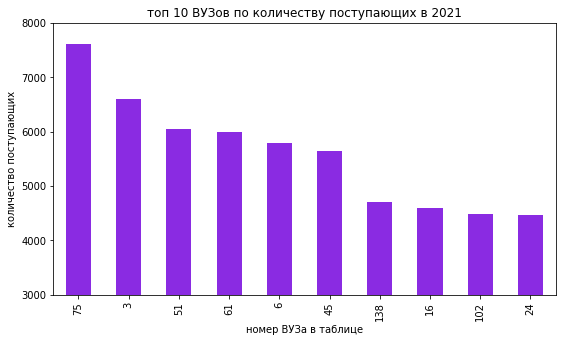

75                                                Уральский федеральный университет им. Б.Н. Ельцина
3                     Национальный исследовательский университет "Высшая школа экономики", г. Москва
51     Российская академия народного хозяйства и государственной службы при Президенте РФ, г. Москва
61                                                    МИРЭА - Российский технологический университет
6                                         Московский государственный университет им. М.В. Ломоносова
45                                                   Казанский (Приволжский) федеральный университет
138                                                                Сибирский федеральный университет
16                               Московский государственный технический университет им. Н.Э. Баумана
102                                                 Российский университет дружбы народов, г. Москва
24                                            Финансовый университет при Правительстве РФ, 

In [97]:
# для большей наглядости - столбиковая диаграмма с пояснением 
descended_10_applicants["Зачислено всего (Б+П), чел. 2021"].plot(kind = 'bar',
                   title = 'топ 10 ВУЗов по количеству поступающих в 2021',
                   xlabel = 'номер ВУЗа в таблице',
                   ylabel = 'количество поступающих',
                   color = 'blueviolet',
                   ylim = (3000, 8000))
plt.show()
print(descended_10_applicants["Вуз"].head(10))

***Главный показатель престижа - количество желающих туда попасть, данная визуализация отражает топ-10 вузов как раз по этому параметру. Но, также, можно посмотреть средний проходной балл на бюджет, ведь обычно чем больше желающих поступить - тем он выше.***

In [103]:
descended_10_points = df.sort_values("Ср.балл ЕГЭ (бюджет) 2021", ascending = False).head(10)

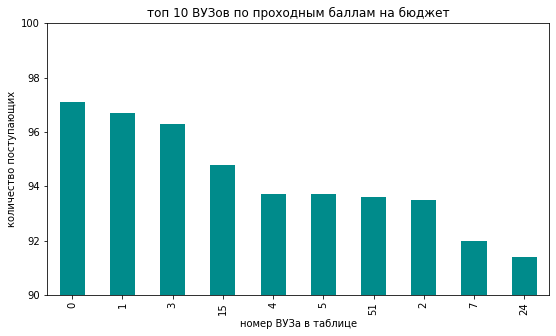

0                                                              Московский физико-технический институт
1                                         Московский государственный институт международных отношений
3                      Национальный исследовательский университет "Высшая школа экономики", г. Москва
15                                            Московская высшая школа социальных и экономических наук
4                                                                Университет ИТМО, г. Санкт-Петербург
5     Национальный исследовательский университет "Высшая школа экономики", филиал, г. Санкт-Петербург
51      Российская академия народного хозяйства и государственной службы при Президенте РФ, г. Москва
2                                Национальный исследовательский ядерный университет "МИФИ", г. Москва
7                                                     Санкт-Петербургский государственный университет
24                                             Финансовый университет при Правител

In [93]:
descended_10_points["Ср.балл ЕГЭ (бюджет) 2021"].plot(kind = 'bar',
                   title = 'топ 10 ВУЗов по проходным баллам на бюджет',
                   xlabel = 'номер ВУЗа в таблице',
                   ylabel = 'количество поступающих',
                   color = 'darkcyan',
                   ylim = (90, 100))
plt.show()
print(descended_10_points["Вуз"].head(10))

**Сравнивая эти два топа, можно заметить, что пересекаются лишь три ВУЗа - ВШЭ, РАНХиГС и Финансовый университет. Можно считать эти три вуза самыми топовыми, но, думаю, УФУ и МФТИ заслуживают входить в этот список тоже, как занявшие первые места в двух распределениях.**